In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import FactorAnalysis

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("datasets/imputed_data_QS.csv")
numeric_data = data.drop(columns=['Rank', 'Institution Name', 'Country', 'Year','CS','CF','RI','Age','STA','Overall'])
numeric_data_standardized = (numeric_data - numeric_data.mean()) / numeric_data.std()

In [3]:
numeric_data_standardized.head()

,AR_SCORE,ER_SCORE,FS_SCORE,CPF_SCORE,IF_SCORE,IS_SCORE,IRN_SCORE,EO_SCORE,S_SCORE
0,3.024884,2.870956,2.260853,2.414919,1.888664,2.069494,1.243874,3.079650,1.874536
1,3.024884,2.870956,2.260853,2.397577,1.877068,1.321199,1.679380,3.127967,1.969759
2,3.024884,2.870956,2.201675,2.414919,1.787199,1.401145,1.681714,3.114253,1.947052
3,3.004376,2.299217,2.260853,2.418388,1.697330,1.848843,0.743728,1.658118,1.145431
4,3.024884,2.870956,2.260853,1.665719,1.813290,2.120659,1.742031,3.121391,1.661430


### Implementing PCA

In [4]:
pca = PCA()
pca.fit(numeric_data_standardized)

explained_variance_ratio = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

for i, var in enumerate(explained_variance_ratio, start=1):
    print(f"PC{i}: {var * 100:.2f}% variance explained")

PC1: 54.68% variance explained
PC2: 12.82% variance explained
PC3: 10.78% variance explained
PC4: 7.11% variance explained
PC5: 5.44% variance explained
PC6: 3.45% variance explained
PC7: 2.38% variance explained
PC8: 2.04% variance explained
PC9: 1.30% variance explained


### Factor Analysis

In [5]:
# KMO Test
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_data)

kmo_all,kmo_model=calculate_kmo(df_scaled)
kmo_model

0.8613561538213419

In [6]:
# Bartlett’s Test of Sphericity
chi2_val, p_val = calculate_bartlett_sphericity(numeric_data)

print(f"Bartlett's test of result:")
print(f"statistic = {chi2_val:.4f}")
print(p_val,"p-value")

Bartlett's test of result:
statistic = 60318.0221
0.0 p-value


In [7]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.fit(numeric_data_standardized)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([4.92087885, 1.15397126, 0.97000319, 0.63965077, 0.48950273,
       0.31093576, 0.21390474, 0.18375586, 0.11739683])

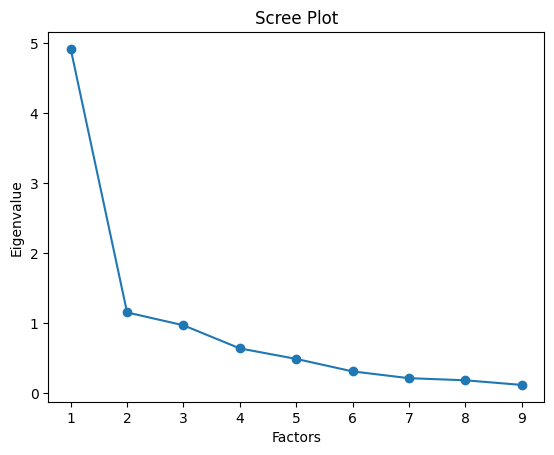

In [8]:
plt.scatter(range(1,df_scaled.shape[1]+1),eigen_values)
plt.plot(range(1,df_scaled.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.show()

In [9]:
fa = FactorAnalyzer(n_factors=4, rotation='varimax', method='principal')
fa.fit(numeric_data_standardized)

fa1 = FactorAnalyzer(n_factors=4, rotation=None, method='principal')
fa1.fit(numeric_data_standardized)

loadings = pd.DataFrame(
    fa.loadings_,
    index = numeric_data_standardized.columns,
    columns=['Factor1', 'Factor2','Factor3','Factor4']
)
print("Loading matrix：\n", loadings)

Loading matrix：
             Factor1   Factor2   Factor3   Factor4
AR_SCORE   0.826870  0.156428  0.157013  0.413838
ER_SCORE   0.897853  0.181945  0.117733  0.181115
FS_SCORE   0.195031  0.090533  0.975093  0.041371
CPF_SCORE  0.165199  0.216812 -0.002476  0.814843
IF_SCORE   0.165771  0.858439  0.034209  0.272027
IS_SCORE   0.199154  0.882037  0.095747  0.161176
IRN_SCORE  0.377020  0.172670  0.054672  0.794816
EO_SCORE   0.852021  0.180052  0.121752  0.279383
S_SCORE    0.524327  0.275551  0.096979  0.668536


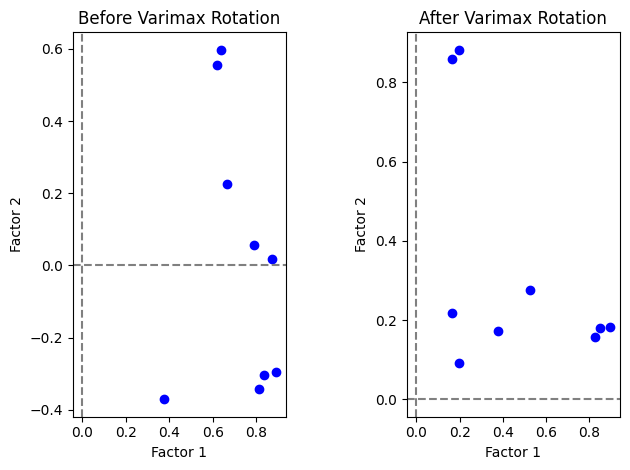

In [10]:
# Plot the difference of using rotation
plt.subplot(1, 2, 1)
plt.scatter(fa1.loadings_[:, 0], fa1.loadings_[:, 1], c='blue')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title("Before Varimax Rotation")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")

plt.subplot(1, 2, 2)
plt.scatter(fa.loadings_[:, 0], fa.loadings_[:, 1], c='blue')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title("After Varimax Rotation")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")

plt.tight_layout(w_pad=5.0, h_pad=2.0)
plt.show()

Factor 1: 1,2,8  AR_SCORE, ER_SCORE, EO_SCORE

Factor 2: 5,6  IF_SCORE, IS_SCORE

Factor 3: 3  FS_SCORE

Factor 4: 4,7,9  CPF_SCORE, IRN_SCORE , S_SCORE

In [11]:
cum_explained_variance_ratio = fa.get_factor_variance()
for i, var in enumerate(cum_explained_variance_ratio[2], start=1):
    print(f"Factor{i}: {var * 100:.2f}% culmulative variance explained")

Factor1: 30.73% culmulative variance explained
Factor2: 50.35% culmulative variance explained
Factor3: 61.76% culmulative variance explained
Factor4: 85.38% culmulative variance explained


In [12]:
fa.get_communalities()

array([0.90409852, 0.88590839, 0.99875179, 0.73827269, 0.83956593,
       0.85279733, 0.8066801 , 0.85123637, 0.80719295])

### Calculate FA_Score

In [13]:
FA_Score = fa.fit_transform(numeric_data_standardized)
FA_Score = pd.DataFrame(FA_Score, columns=['FA_1', 'FA_2','FA_3','FA_4'])
FA_Score_standardized = (FA_Score - FA_Score.min()) / (FA_Score.max() - FA_Score.min())
FA_Score_standardized.head()

,FA_1,FA_2,FA_3,FA_4
0,0.759353,0.660649,0.758502,0.653160
1,0.761055,0.547066,0.762039,0.720414
2,0.761588,0.547089,0.748739,0.719905
3,0.630186,0.642320,0.804791,0.648269
4,0.784793,0.657972,0.758207,0.603382


### Calculate PCA_Score

In [14]:
col_factor1 = ['AR_SCORE', 'ER_SCORE', 'EO_SCORE']
col_factor2 = ['IF_SCORE', 'IS_SCORE']
col_factor3 = ['FS_SCORE']
col_factor4 = ['CPF_SCORE', 'IRN_SCORE', 'S_SCORE']
factor1 = numeric_data_standardized[col_factor1]
factor2 = numeric_data_standardized[col_factor2]
factor3 = numeric_data_standardized[col_factor3]
factor4 = numeric_data_standardized[col_factor4]

In [15]:
# PCA for each factor
factor_num = loadings.shape[1]
explained_variance_ratio = np.zeros(factor_num)

pca = PCA(n_components = 1)
pca_scores1 = pca.fit_transform(factor1)
explained_variance_ratio[0] = pca.explained_variance_ratio_[0]
pca_scores2 = pca.fit_transform(factor2)
explained_variance_ratio[1] = pca.explained_variance_ratio_[0]
pca_scores3 = pca.fit_transform(factor3)
explained_variance_ratio[2] = pca.explained_variance_ratio_[0]
pca_scores4 = pca.fit_transform(factor4)
explained_variance_ratio[3] = pca.explained_variance_ratio_[0]

In [16]:
for i, var in enumerate(explained_variance_ratio, start=1):
    print(f"Factor {i}: {var * 100:.2f}% variance explained")

Factor 1: 87.70% variance explained
Factor 2: 84.25% variance explained
Factor 3: 100.00% variance explained
Factor 4: 76.17% variance explained


In [17]:
PCA_Score = np.column_stack((pca_scores1, pca_scores2, pca_scores3, pca_scores4))
PCA_Score = pd.DataFrame(PCA_Score, columns=['pca_1', 'pca_2','pca_3','pca_4'])
PCA_Score_standardized = (PCA_Score - PCA_Score.min()) / (PCA_Score.max() - PCA_Score.min())
PCA_Score_standardized.head()

,pca_1,pca_2,pca_3,pca_4
0,0.995439,0.979328,1.000000,0.926707
1,0.999386,0.853371,1.000000,0.979129
2,0.998265,0.851726,0.982811,0.978599
3,0.830329,0.911039,1.000000,0.802198
4,0.998849,0.975315,1.000000,0.889458


In [18]:
model_score = pd.concat([data[['Institution Name','Country','Year']],FA_Score_standardized, PCA_Score_standardized],axis = 1)
model_score.to_csv('datasets\model_score.csv',index = False)
model_score.head()

,Institution Name,Country,Year,FA_1,FA_2,FA_3,FA_4,pca_1,pca_2,pca_3,pca_4
0,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,2018,0.759353,0.660649,0.758502,0.653160,0.995439,0.979328,1.000000,0.926707
1,STANFORD UNIVERSITY,United States,2018,0.761055,0.547066,0.762039,0.720414,0.999386,0.853371,1.000000,0.979129
2,HARVARD UNIVERSITY,United States,2018,0.761588,0.547089,0.748739,0.719905,0.998265,0.851726,0.982811,0.978599
3,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,2018,0.630186,0.642320,0.804791,0.648269,0.830329,0.911039,1.000000,0.802198
4,UNIVERSITY OF CAMBRIDGE,United Kingdom,2018,0.784793,0.657972,0.758207,0.603382,0.998849,0.975315,1.000000,0.889458
